In [170]:
!git config --global user.email "proce.thomas@gmail.com"
!git config --global user.name "Thomas Proce"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/Othercomputers/Il mio MacBook Air/DataScience/PROFESSION_AI/Deep_Learning/progetto_finale"

/content/drive/Othercomputers/Il mio MacBook Air/DataScience/PROFESSION_AI/Deep_Learning/progetto_finale


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS

In [5]:
import pandas as pd
BASE_URL = "https://s3.eu-west-3.amazonaws.com/profession.ai/datasets/"
df = pd.read_csv(BASE_URL+"Filter_Toxic_Comments_dataset.csv")

# **EXPLORATIVE DATA ANALYSIS**


In this section we are going to perform an initial exploratory data analysis.

1. Checking the integrity of the data in the dataset, i.e. checking for null, missing or duplicate values.
2. Analysis of the frequency tables of values to check the distribution of the features
3. Checking the balance of the classes (number of sentences containing offence or not)
4. Analysis of sentence length statistics and verification of the presence of outliers in the corpus (particularly long texts).


In [6]:
df.head(10)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum_injurious
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


In [7]:
df.shape

(159571, 8)

In [145]:
def checking_function(df):
    """
    Check for null, duplicated, and NaN values.

    Args:
        df (pd.DataFrame): The dataframe to check.

    Returns:
        None
    """

    # check for null values
    if df.isnull().values.any():
        print("Null values present")
    else:
        print("No null values")

    # check for duplicated values
    if df.duplicated().values.any():
        print("Duplicated values present")
    else:
        print("No duplicated values")

    # check for missing values
    if df.isna().values.any():
        print("Missing values present")
    else:
        print("No missing values")

In [146]:
# check for missing values

checking_function(df)

No null values
No duplicated values
No missing values


In [193]:
def plot_bar(data, color='skyblue', figsize=(10, 6), xlabel='Labels', ylabel='Frequency',title = 'Plot Bar'):
    """
    Plot a bar plot.

    Args:
        data (pd.Series): The data for the bar plot.
        color (str, optional): The color of the bars. Defaults to 'skyblue'.
        figsize (tuple, optional): The figure size of the plot. Defaults to (10, 6).
        xlabel (str, optional): The label for the x-axis. Defaults to 'Labels'.
        ylabel (str, optional): The label for the y-axis. Defaults to 'Frequency'.
    """

    sorted_data = data.sort_values(ascending=False)

    sns.set_palette("viridis")

    plt.figure(figsize=figsize)
    ax = sns.barplot(x=sorted_data.index, y=sorted_data.values, color=color)

    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=10, color='black')

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

In [194]:
# Explore frequency and relative frequency tables
freq_table = df.iloc[:, 1:7].sum(axis=0)
rel_freq_table = (freq_table/freq_table.sum())*100

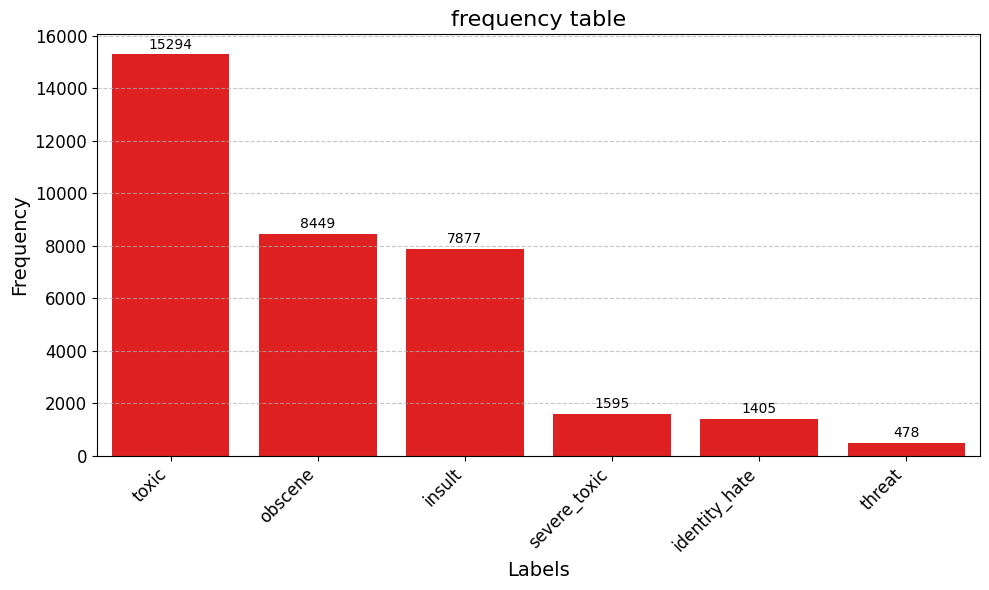

In [195]:
# plot a frequency table
plot_bar(freq_table, xlabel='Labels', ylabel='Frequency',title = 'frequency table',color = 'red')

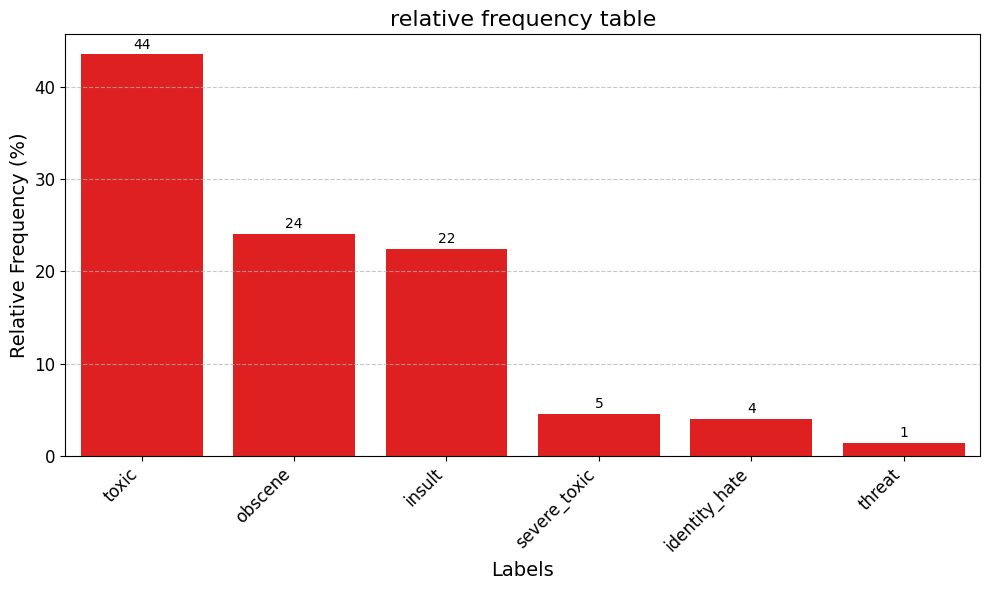

In [155]:
plot_bar(rel_freq_table, xlabel='Labels', ylabel='Relative Frequency (%)',title = 'relative frequency table',color = 'red')

### **Frequency tables**

We can see from the frequency table that the majority of the sentences contain toxic comments, followed by obscene and insult.

The less represented labels are sever_toxic,identity_hate and threat.

### **Relative frequency table**

From the relative frequency tables you can see that the last 3 labels all together represent only 10% of the total corpus

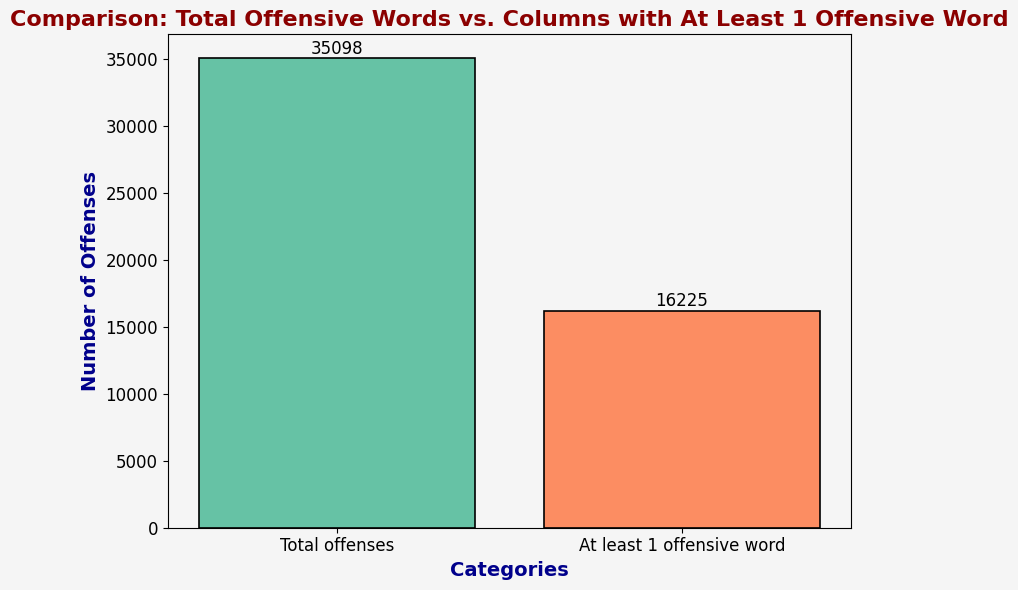

In [156]:
def plot_comparison_bar_chart(data, labels, title, xlabel, ylabel, colors=['#66c2a5', '#fc8d62']):
    fig, ax = plt.subplots(figsize=(8, 6), facecolor='#f5f5f5')

    bars = ax.bar(labels, data, color=colors, edgecolor='black', linewidth=1.2)

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval),
                ha='center', va='bottom', fontsize=12, color='black')

    plt.title(title, fontsize=16, color='darkred', fontweight='bold')
    plt.xlabel(xlabel, fontsize=14, color='darkblue', fontweight='bold')
    plt.ylabel(ylabel, fontsize=14, color='darkblue', fontweight='bold')

    ax.tick_params(axis='both', labelsize=12, colors='black')
    ax.set_facecolor('#f5f5f5')

    plt.tight_layout()
    plt.show()

# Extracting relevant data from the DataFrame
offensive_words = df['sum_injurious'].sum()
offensive_per_column = df[df['sum_injurious'] > 0].shape[0]

# Creating data and labels for the bar chart
count = [offensive_words, offensive_per_column]
labels = ['Total offenses', 'At least 1 offensive word']

# Plotting the bar chart using the refactored function
plot_comparison_bar_chart(count, labels,
                          'Comparison: Total Offensive Words vs. Columns with At Least 1 Offensive Word',
                          'Categories', 'Number of Offenses')


In [15]:
# divide into clean and dirty sentences
clean_sentences = df[df.iloc[:, 1:7].sum(axis=1) == 0].shape[0]
dirty_sentences = df[df.iloc[:, 1:7].sum(axis=1) != 0].shape[0]
total_offenses = df['sum_injurious'].sum()

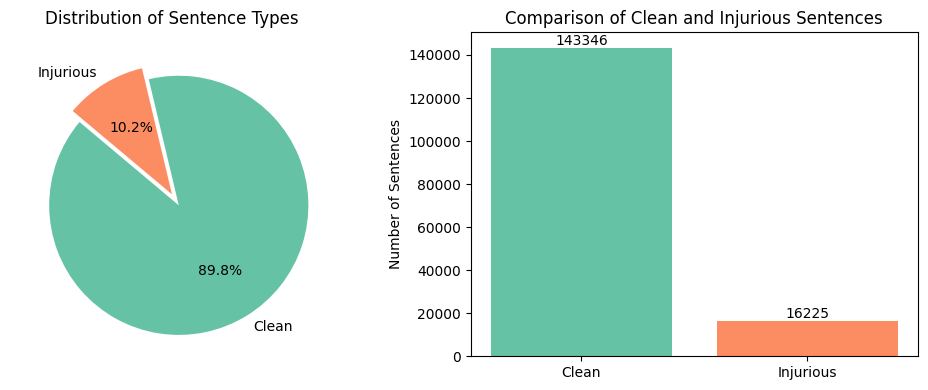

In [16]:
# Data for plotting
count = [clean_sentences, dirty_sentences]
labels = ['Clean', 'Injurious']
plt.figure(figsize=(10, 4))
# Plotting the pie chart
plt.subplot(1, 2, 1)
colors = ['#66c2a5', '#fc8d62']  # Custom colors for the pie chart
explode = (0.1, 0)  # To explode the 'Clean' slice slightly

plt.pie(count, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=140)
plt.title('Distribution of Sentence Types')

# Plotting the bar chart
plt.subplot(1, 2, 2)
plt.bar(labels, count, color=colors)

# Adding data labels on top of the bars
for i, value in enumerate(count):
    plt.text(i, value + 10, str(value), ha='center', va='bottom')

plt.title('Comparison of Clean and Injurious Sentences')
plt.ylabel('Number of Sentences')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [17]:
# Check if the sum_injurious column present any discrepancy in the sum of other labels

# Filter the DataFrame for rows where sum_injurious is 0
zero_injurious_df = df[df['sum_injurious'] == 0]

# Check if any of the other labels is 1 in the filtered DataFrame
mismatch_rows = zero_injurious_df[(zero_injurious_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']] == 1).any(axis=1)]

# Get the number of rows where there's a mismatch
mismatch_count = len(mismatch_rows)

print(f'Number of rows where sum_injurious is 0 but another label is 1: {mismatch_count}')

Number of rows where sum_injurious is 0 but another label is 1: 0


### **Class Imbalance**

* We can see that near 90% of the corpus is
composed of clean sentences and only the remaining 10% is composed of injurious sentences.
This highlights a concrete problem of class imbalance in the dataset.

* In contrast we can see that the total offenses present in the corpus amount to something like 35.000.
We have 35.000 offenses distributed on a total of 16.225 columns

In [18]:
# Check the average length of the sentences
average_sentences_length = df['comment_text'].str.len().mean()
print(f'Average length of sentences: {round(average_sentences_length,2)} characters')

Average length of sentences: 394.07 characters


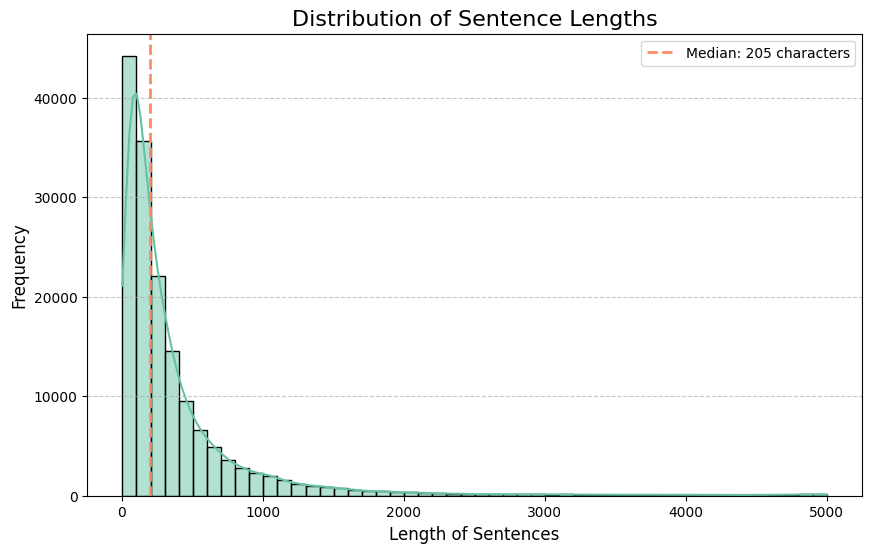

In [19]:
# Assuming 'comment_text' is the column containing sentences
lengths = df['comment_text'].str.len()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram with KDE
sns.histplot(data = df,x = lengths, kde=True, color='#66c2a5', bins=50, ax=ax)

# Customize plot aesthetics
ax.set_title('Distribution of Sentence Lengths', fontsize=16)
ax.set_xlabel('Length of Sentences', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
# Add vertical lines for quartiles or other statistics if desired
ax.axvline(lengths.median(), color='#fc8d62', linestyle='dashed', linewidth=2,
           label=f"Median: {lengths.median():.0f} characters")
# Add legend if needed
ax.legend()

# Show the plot
plt.show()

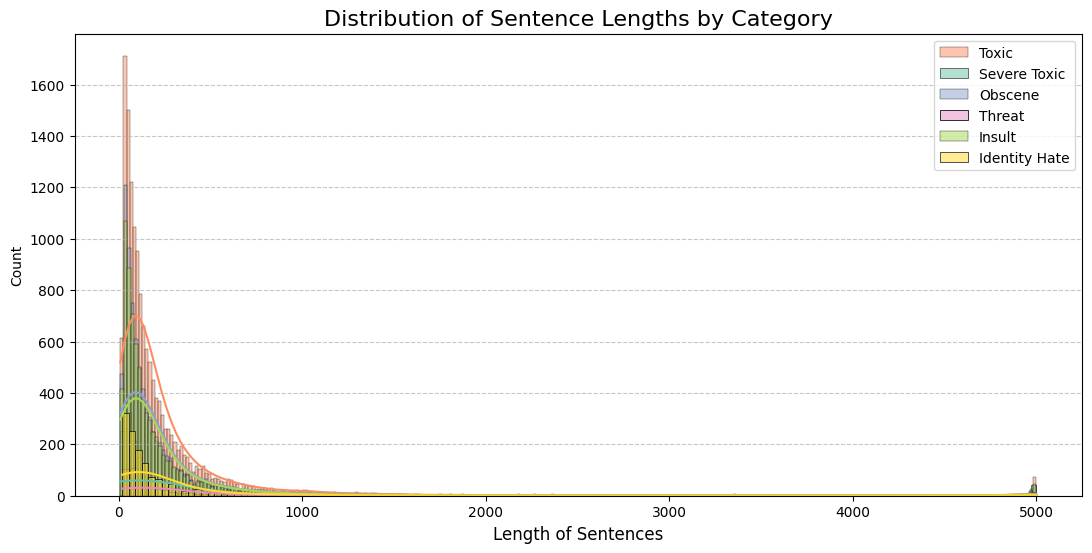

In [20]:
# Check the distribution of the sentences lengths for each category
toxic_lenghts = df[df['toxic'] == 1]['comment_text'].str.len()
severe_toxic_lenghts = df[df['severe_toxic'] == 1]['comment_text'].str.len()
obscene_lenghts = df[df['obscene'] == 1]['comment_text'].str.len()
threat_lenghts = df[df['threat'] == 1]['comment_text'].str.len()
insult_lenghts = df[df['insult'] == 1]['comment_text'].str.len()
identity_hate_lenghts = df[df['identity_hate'] == 1]['comment_text'].str.len()

# plot the distributions
fig, ax = plt.subplots(figsize=(13, 6))

sns.histplot(toxic_lenghts, color='#fc8d62', label='Toxic', ax=ax,kde=True)
sns.histplot(severe_toxic_lenghts, color='#66c2a5', label='Severe Toxic', ax=ax,kde=True)
sns.histplot(obscene_lenghts, color='#8da0cb', label='Obscene', ax=ax,kde=True)
sns.histplot(threat_lenghts, color='#e78ac3', label='Threat', ax=ax,kde=True)
sns.histplot(insult_lenghts, color='#a6d854', label='Insult', ax=ax,kde=True)
sns.histplot(identity_hate_lenghts, color='#ffd92f', label='Identity Hate', ax=ax,kde=True)

ax.set_title('Distribution of Sentence Lengths by Category', fontsize=16)
ax.set_xlabel('Length of Sentences', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

plt.show()

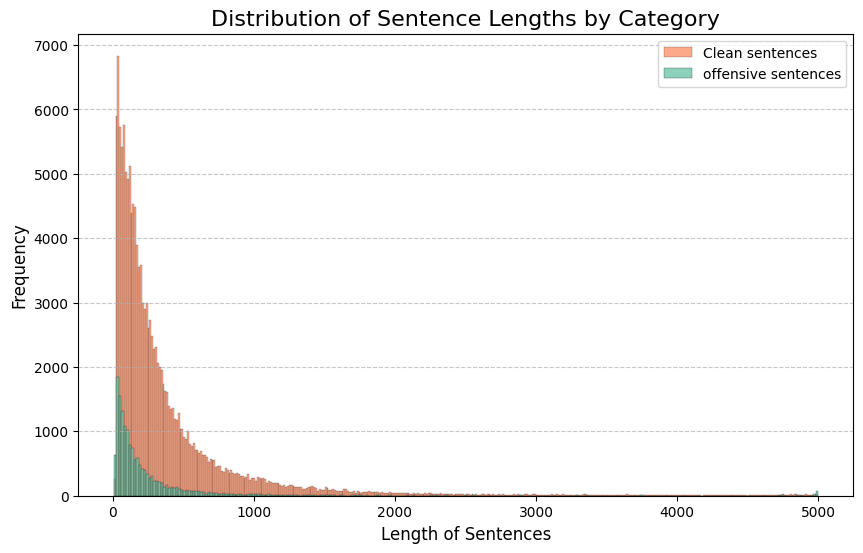

In [21]:
clean_sentences_lenght = df[df['sum_injurious'] == 0]['comment_text'].str.len()
dirty_sentences_lenght = df[df['sum_injurious'] != 0]['comment_text'].str.len()

# plot the distributions
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(clean_sentences_lenght, color='#fc8d62', label='Clean sentences', ax=ax)
sns.histplot(dirty_sentences_lenght, color='#66c2a5', label='offensive sentences', ax=ax)

ax.set_title('Distribution of Sentence Lengths by Category', fontsize=16)
ax.set_xlabel('Length of Sentences', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

plt.show()

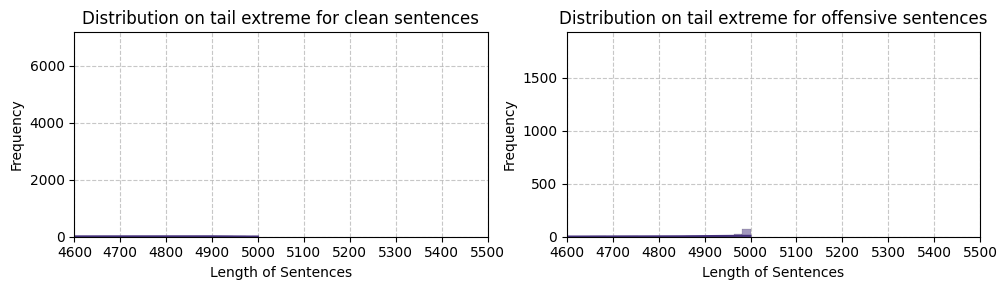

In [22]:
# Zoom out the extreme tail
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.histplot(df,x=clean_sentences_lenght, kde=True)
plt.grid(linestyle='--', alpha=0.7)
plt.title('Distribution on tail extreme for clean sentences')
plt.xlabel('Length of Sentences')
plt.ylabel('Frequency')
plt.xlim(4600,5500)

plt.subplot(1, 2, 2)
sns.histplot(df,x=dirty_sentences_lenght, kde=True)
plt.grid(linestyle='--', alpha=0.7)
plt.title('Distribution on tail extreme for offensive sentences')
plt.xlabel('Length of Sentences')
plt.ylabel('Frequency')
# set the max length for dirty sentences
plt.xlim(4600,5500)
plt.tight_layout()
plt.show()

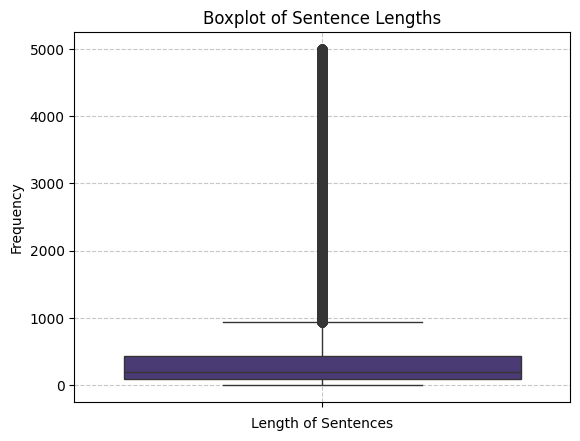

In [23]:
# use a boxplot to visualize the distribution of sentence lengths
sns.boxplot(data = df,y=df['comment_text'].str.len())
plt.grid(linestyle='--', alpha=0.7)
plt.title('Boxplot of Sentence Lengths')
plt.xlabel('Length of Sentences')
plt.ylabel('Frequency')
plt.show()

In [24]:
# check the max and min lengths
max_length = df['comment_text'].str.len().max()
min_length = df['comment_text'].str.len().min()

print(f"Maximum sentence length: {max_length} characters")
print(f"Minimum sentence length: {min_length} characters")

Maximum sentence length: 5000 characters
Minimum sentence length: 6 characters


In [25]:
# check the average length for clean sentences and for dirty sentences
avg_clean_length = df[df['sum_injurious'] == 0]['comment_text'].str.len().mean()
avg_dirty_length = df[df['sum_injurious'] != 0]['comment_text'].str.len().mean()

print(f"Average length of clean sentences: {round(avg_clean_length)} characters")
print(f"Average length of dirty sentences: {round(avg_dirty_length)} characters")

Average length of clean sentences: 404 characters
Average length of dirty sentences: 303 characters


### **Analysis of sentence lengths distributions**

- To measure the central tendency in that case we used the median for it's quality to be more robust with skewed distributions.
You can see that the median value is around 205 characters for the sentences length.

- It can be seen that the length of most sentences in the corpus is between 6 and 1,000 characters.
It can also be seen from both the histograms and the boxplot how there are some extremely long sentences that reach up to 5000 characters.
It can be seen from the histograms and especially from the boxplot how these outliers are a little bit more present in the corpus containing the offending sentences.
In any case, it will be necessary to take into account the presence of these sentences with such anomalous length and process them appropriately later.

- Another interesting fact is that the average length for clean sentences is higher than the average length for dirty sentences.

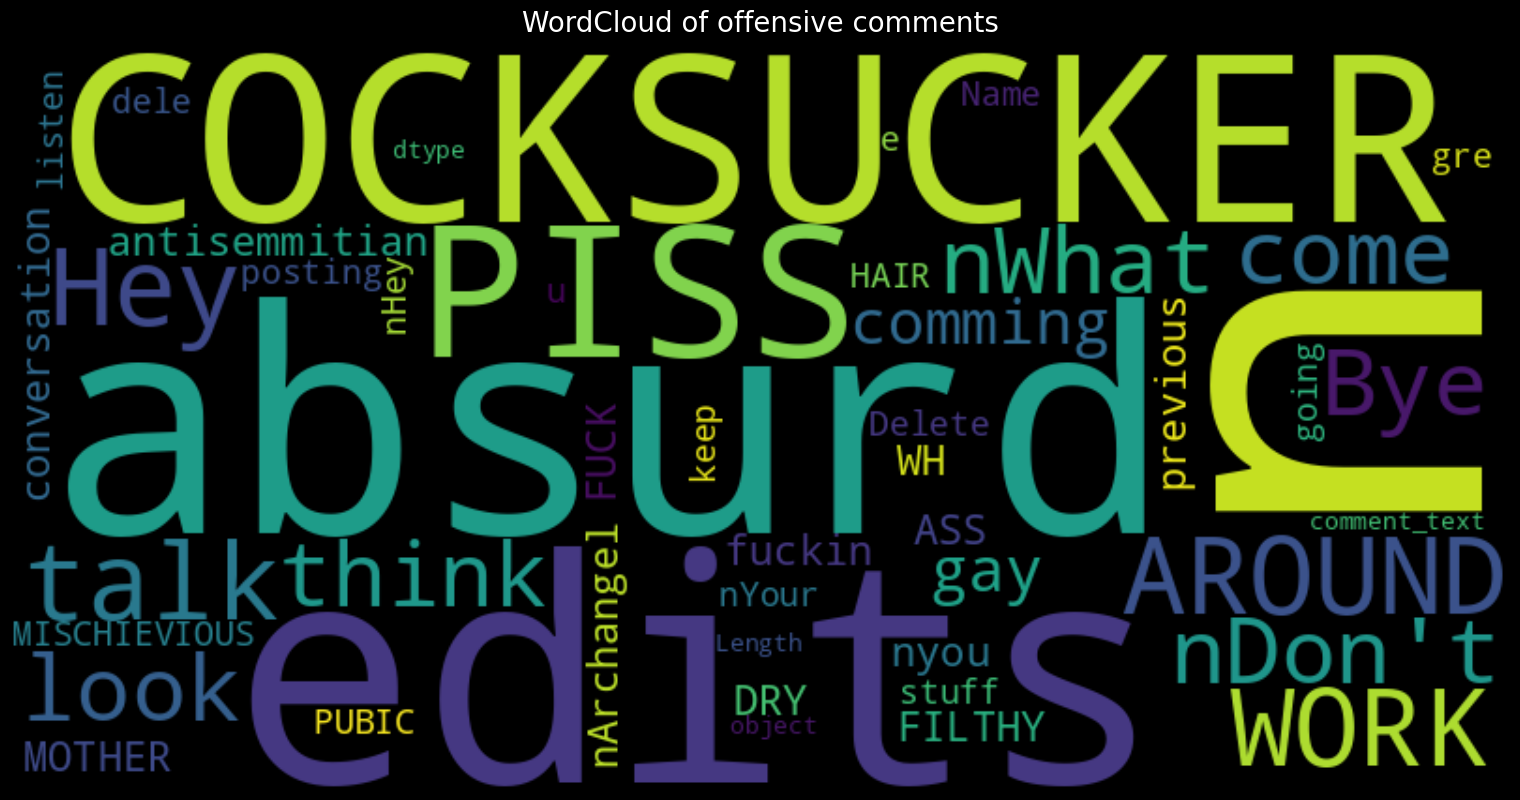

In [26]:
# Assuming 'comment_text' is the column containing sentences and 'toxic' is the label for toxic comments
toxic_comments = df[df['sum_injurious'] != 0]['comment_text']
# Create and generate a WordCloud image with toxic comments
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',  # Change background color to white for better visibility
    stopwords=STOPWORDS,
    max_words=200,
    colormap='viridis',
    contour_color='#4B778D',  # Petroleum blue
    contour_width=2,
).generate(str(toxic_comments))

# Display the generated image
fig, ax = plt.subplots(figsize=(15, 8), facecolor='k', edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Add a title
plt.title('WordCloud of offensive comments', fontsize=20, color='white')

# Adjust layout for better spacing
plt.tight_layout(pad=0)

# Show the plot
plt.show()


## **Overall summary of the exploratory analysis:**

- Most of the offensive phrases fall within the comments defined as "toxic."
- The last 3 labels of the total 6 cover just 10% of the total dataset
- The dataset is highly unbalanced as the number of clean sentences in the corpus accounts for 90% of the dataset versus just 10% of the offensive sentences.
- Some sentences with an abnormal length are present thus determining the presence of some outliers.

# **STEP 2: PREPROCESSING**

In [27]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load and download necessary libraries
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
def preprocess_text(corpus):
    """
    Preprocesses a text corpus using various text cleaning techniques.

    Parameters:
    - corpus (str): The input text corpus to be preprocessed.

    Returns:
    - str: Preprocessed text from the input corpus.
    """
    # Remove URLs
    corpus = re.sub(r'http\S+', '', corpus)
    # Lowercasing
    corpus = corpus.lower()
    # Remove punctuations
    corpus = re.sub(r'[^\w\s]', '', corpus)
    # Remove stopwords
    corpus = ' '.join([word for word in corpus.split() if word not in stopwords])
    # Lemmatization
    corpus = ' '.join([lemmatizer.lemmatize(word) for word in corpus.split()])
    # Remove HTML tags
    corpus = re.sub(r'<.*?>', '', corpus)
    # Remove numbers
    corpus = re.sub(r'\d+', '', corpus)
    # Remove extra spaces
    corpus = re.sub(r'\s+', ' ', corpus).strip()

    return corpus


In [29]:
prep_data = df.copy()

In [30]:
prep_data['comment_text'] = prep_data['comment_text'].apply(preprocess_text)

In [31]:
# check the average number of tokens
avg_tokens = prep_data['comment_text'].str.len().mean()
median_tokens = prep_data['comment_text'].str.len().median()

print(f"Average number of tokens: {round(avg_tokens)}")
print(f"Median number of tokens: {round(median_tokens)}")

Average number of tokens: 245
Median number of tokens: 125


<Axes: ylabel='comment_text'>

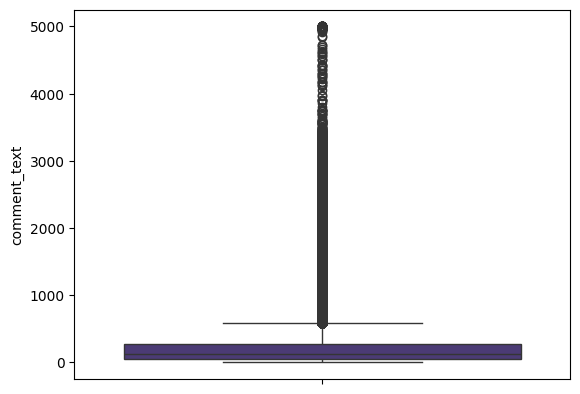

In [32]:
sns.boxplot(data = prep_data,y=prep_data['comment_text'].str.len())

# **STEP 3: PREPARING DATA FOR MODELING**

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter

In [34]:
# define the vectorizer
VOCAB_SIZE = 10000
vectorizer = TfidfVectorizer(max_features=VOCAB_SIZE)

In [35]:
# Divide data into train and validation
X = prep_data[['comment_text','sum_injurious']]
y = prep_data[['toxic','severe_toxic','obscene','threat','insult','identity_hate']]

In [36]:
X_train,X_val,y_train,y_val = train_test_split(X,y,
                                               test_size=0.3,
                                               random_state=42)

_, X_test, _, y_test = train_test_split(X_val,y_val,
                                        test_size=0.1,
                                        random_state=42)

In [37]:
# Count all the % for all occurence in the labels

# Count all the % for all occurence in the labels
train_labels = y_train.columns
val_labels = y_val.columns
test_labels = y_test.columns

# make a dict with all the percentages
train_perc = {}
val_perc = {}
test_perc = {}
for label in train_labels:
    train_perc[label] = y_train[label].sum() / len(y_train) * 100
    val_perc[label] = y_val[label].sum() / len(y_val) * 100
    test_perc[label] = y_test[label].sum() / len(y_test) * 100

# print the results
print("LABELS PRESENCE IN TRAIN SET (in %):")
for label, perc in train_perc.items():
    print(f"{label}: {perc:.2f}%")

print("\nLABELS PRESENCE IN VALIDATION SET (in %):")
for label, perc in val_perc.items():
    print(f"{label}: {perc:.2f}%")

print("\nLABELS PRESENCE IN TEST SET (in %):")
for label, perc in test_perc.items():
    print(f"{label}: {perc:.2f}%")


LABELS PRESENCE IN TRAIN SET (in %):
toxic: 9.59%
severe_toxic: 0.99%
obscene: 5.28%
threat: 0.31%
insult: 4.91%
identity_hate: 0.87%

LABELS PRESENCE IN VALIDATION SET (in %):
toxic: 9.57%
severe_toxic: 1.02%
obscene: 5.34%
threat: 0.28%
insult: 4.99%
identity_hate: 0.90%

LABELS PRESENCE IN TEST SET (in %):
toxic: 8.54%
severe_toxic: 1.11%
obscene: 5.05%
threat: 0.15%
insult: 4.97%
identity_hate: 0.94%


# First NAIVE base model

In [38]:
from sklearn.multioutput import ClassifierChain
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC

# METRICS
from sklearn.metrics import (multilabel_confusion_matrix,
                             classification_report,
                             roc_curve,
                             roc_auc_score,
                             accuracy_score,
                             f1_score,
                             hamming_loss,
                             precision_score,
                             recall_score,
                             precision_recall_curve)

In [39]:
# Define a function to plot Confusion matrix for multi-label classification

def plot_multilabel_confusion_matrix(mcm, labels, title,normalize=False):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    fig.suptitle(title, fontsize=16)

    for i, (label, matrix) in enumerate(zip(labels, mcm)):
        row = i // 3
        col = i % 3

        if normalize:
            matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
            sns.heatmap(matrix, ax=axes[row, col], annot=True, fmt=".2f",cmap="YlGnBu", linewidths=.5)
        else:

            sns.heatmap(matrix, ax=axes[row, col], annot=True, fmt="d",cmap="YlGnBu", linewidths=.5)

        axes[row, col].set_title(label, fontsize=12)
        axes[row, col].set_xlabel('Predicted', fontsize=10)
        axes[row, col].set_ylabel('Actual', fontsize=10)

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 0.9, 0.95])

    plt.show()

labels = ['Toxic', 'Severe Toxic', 'Obscene', 'Threat', 'Insult', 'Identity Hate']

In [40]:
# define a naive model
naive_clf = ClassifierChain(LogisticRegression(solver='newton-cg',multi_class='multinomial'),
                            order='random',
                            random_state=42,
                            cv = 5)

# Define a naive pipeline
preprocessor = ColumnTransformer([
    ('tfidf', vectorizer, 'comment_text'),
    ('pass', 'passthrough', ['sum_injurious'])
])

naive_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', naive_clf)
])

In [41]:
naive_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('tfidf',
                                                  TfidfVectorizer(max_features=10000),
                                                  'comment_text'),
                                                 ('pass', 'passthrough',
                                                  ['sum_injurious'])])),
                ('clf',
                 ClassifierChain(base_estimator=LogisticRegression(multi_class='multinomial',
                                                                   solver='newton-cg'),
                                 cv=5, order='random', random_state=42))])

In [42]:
naive_preds = naive_pipeline.predict(X_val)

In [43]:
# Show the hamming loss
print(f"Hamming loss: {hamming_loss(y_val, naive_preds):.3f}")

Hamming loss: 0.005


In [44]:
print(classification_report(y_val, naive_preds,
                            target_names=labels,
                            zero_division=1))

               precision    recall  f1-score   support

        Toxic       0.94      0.99      0.97      4582
 Severe Toxic       0.81      0.70      0.75       486
      Obscene       0.95      0.93      0.94      2556
       Threat       0.80      0.40      0.54       136
       Insult       0.92      0.91      0.91      2389
Identity Hate       0.90      0.56      0.69       432

    micro avg       0.93      0.92      0.93     10581
    macro avg       0.89      0.75      0.80     10581
 weighted avg       0.93      0.92      0.92     10581
  samples avg       0.99      0.99      0.99     10581



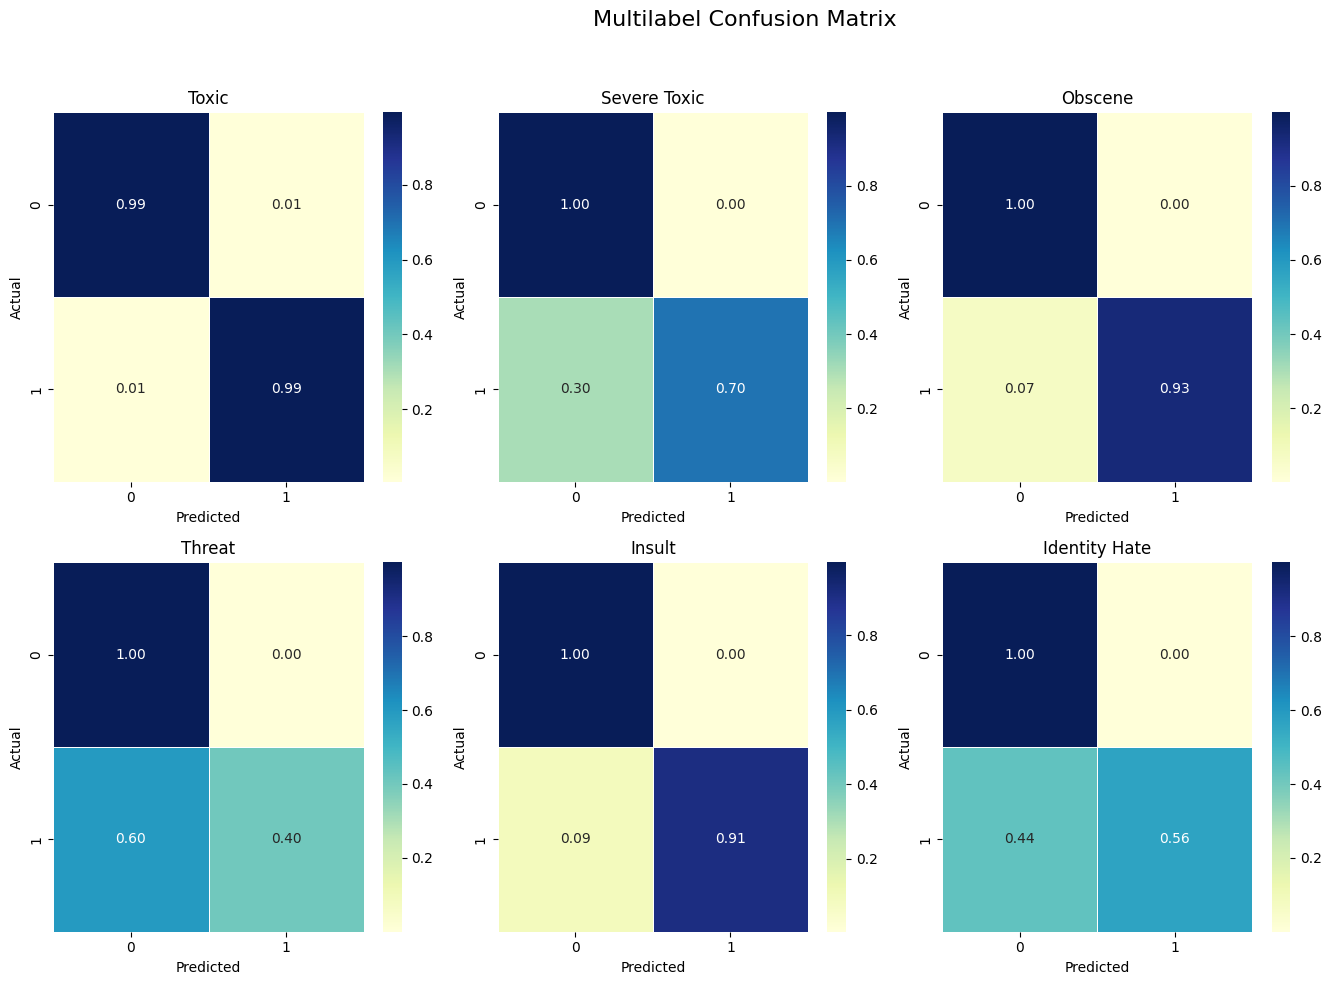

In [45]:
mcm = multilabel_confusion_matrix(y_val, naive_preds)

# plot the matrix
plot_multilabel_confusion_matrix(mcm, labels, 'Multilabel Confusion Matrix', normalize=True)


In [46]:
test_preds = naive_pipeline.predict(X_test)

In [47]:
print(classification_report(y_test, test_preds,
                            target_names=labels,
                            zero_division=1))

               precision    recall  f1-score   support

        Toxic       0.91      1.00      0.95       409
 Severe Toxic       0.80      0.66      0.72        53
      Obscene       0.97      0.95      0.96       242
       Threat       0.67      0.29      0.40         7
       Insult       0.95      0.87      0.91       238
Identity Hate       0.79      0.42      0.55        45

    micro avg       0.92      0.90      0.91       994
    macro avg       0.85      0.70      0.75       994
 weighted avg       0.92      0.90      0.91       994
  samples avg       0.99      0.99      0.99       994



# **REPORT FOR THE NAIVE MODEL**

The model overall despite its simplicity succeeded very well in identifying the labels most represented in the dataset bringing home some pretty good results overall.
The hamming loss is also very low.

In spite of this it can be seen immediately from the confusion matrices how the model struggles to correctly identify the 3 least represented labels **['severe_toxic',identity_hate','threat']**

# Using Deep Learning



In [78]:
import tensorflow as tf
from tensorflow.keras.layers import (Dense,Embedding,
                                     TextVectorization,
                                     Conv1D,
                                     GlobalMaxPooling1D,
                                     Flatten,
                                     LSTM,GRU,
                                     Bidirectional,
                                     Input)

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping

In [96]:
# Divide data into train and validation
train_sentences = df[['comment_text','sum_injurious']].to_numpy()
labels = df[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].to_numpy()

In [97]:
MAX_LENGTH = 125 # The median value for length of comment text after preprocessing
VOCAB_SIZE = 10000

In [98]:
Text_vectorizer = TextVectorization(max_tokens=VOCAB_SIZE,
                                    output_mode='int',
                                    output_sequence_length=MAX_LENGTH,
                                    pad_to_max_tokens=True,
                                    name='text_vectorizer',
                                    standardize = 'lower_and_strip_punctuation')

Text_vectorizer.adapt(train_sentences[:,0])

In [99]:
train_set = tf.data.Dataset.from_tensor_slices((train_sentences[:,0],labels))
train_set = train_set.shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)

In [100]:
# Split the data into train,val,test

training_dataset = train_set.take(round(len(train_set)*0.8))
val_dataset = train_set.skip(round(len(train_set)*0.8)).take(round(len(train_set)*0.1))
testing_dataset = train_set.skip(round(len(train_set)*0.9))

In [101]:
len(training_dataset),len(val_dataset),len(testing_dataset)

(3990, 499, 499)

In [102]:
# Create the embedding layer
embedding_layer = Embedding(input_dim=VOCAB_SIZE,
                            output_dim=128,
                            embeddings_initializer='uniform',
                            input_length=MAX_LENGTH,
                            name='embedding_layer')

In [103]:
model_input = Input(shape=(1,), dtype='string', name='input_layer')

x = Text_vectorizer(model_input)

x = embedding_layer(x)

x = GlobalMaxPooling1D()(x)

model_output = Dense(6, activation='sigmoid')(x)

Net = tf.keras.Model(model_input, model_output)

In [104]:
Net.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorizer (TextVecto  (None, 125)               0         
 rization)                                                       
                                                                 
 embedding_layer (Embedding  (None, 125, 128)          1280000   
 )                                                               
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                             

In [105]:
ROC_AUC = tf.keras.metrics.AUC(name='roc_auc', curve='ROC',
                               summation_method='interpolation',
                               num_thresholds=200,
                               multi_label=True,
                               num_labels = 6)

PRECISION_RECALL = tf.keras.metrics.AUC(name='precision_recall', curve='PR',
                                         summation_method='interpolation',
                                         num_thresholds=200,
                                         multi_label=True,
                                         num_labels = 6)

early_stop = EarlyStopping(monitor='val_loss',
                           patience=3,
                           verbose=1,
                           mode='auto',
                           min_delta = 0.01,
                           restore_best_weights=True,
                           start_from_epoch=3)

In [106]:
# Compile

Net.compile(loss='binary_crossentropy',
            optimizer=Adam(),
            metrics=[ROC_AUC, PRECISION_RECALL])

In [107]:
# Fit

history = Net.fit(training_dataset,
                  epochs=100,
                  validation_data=(val_dataset),
                  callbacks=[early_stop])

Epoch 1/100
3990/3990 [==============================] - 37s 9ms/step - loss: 0.0933 - roc_auc: 0.8727 - precision_recall: 0.3218 - val_loss: 0.0575 - val_roc_auc: 0.9539 - val_precision_recall: 0.5046
Epoch 2/100
3990/3990 [==============================] - 35s 9ms/step - loss: 0.0528 - roc_auc: 0.9585 - precision_recall: 0.5172 - val_loss: 0.0514 - val_roc_auc: 0.9601 - val_precision_recall: 0.5254
Epoch 3/100
3990/3990 [==============================] - 36s 9ms/step - loss: 0.0473 - roc_auc: 0.9684 - precision_recall: 0.5619 - val_loss: 0.0501 - val_roc_auc: 0.9594 - val_precision_recall: 0.5608
Epoch 4/100
3990/3990 [==============================] - 38s 9ms/step - loss: 0.0438 - roc_auc: 0.9745 - precision_recall: 0.6083 - val_loss: 0.0487 - val_roc_auc: 0.9653 - val_precision_recall: 0.6009
Epoch 5/100
3990/3990 [==============================] - 35s 9ms/step - loss: 0.0411 - roc_auc: 0.9804 - precision_recall: 0.6633 - val_loss: 0.0481 - val_roc_auc: 0.9662 - val_precision_recal

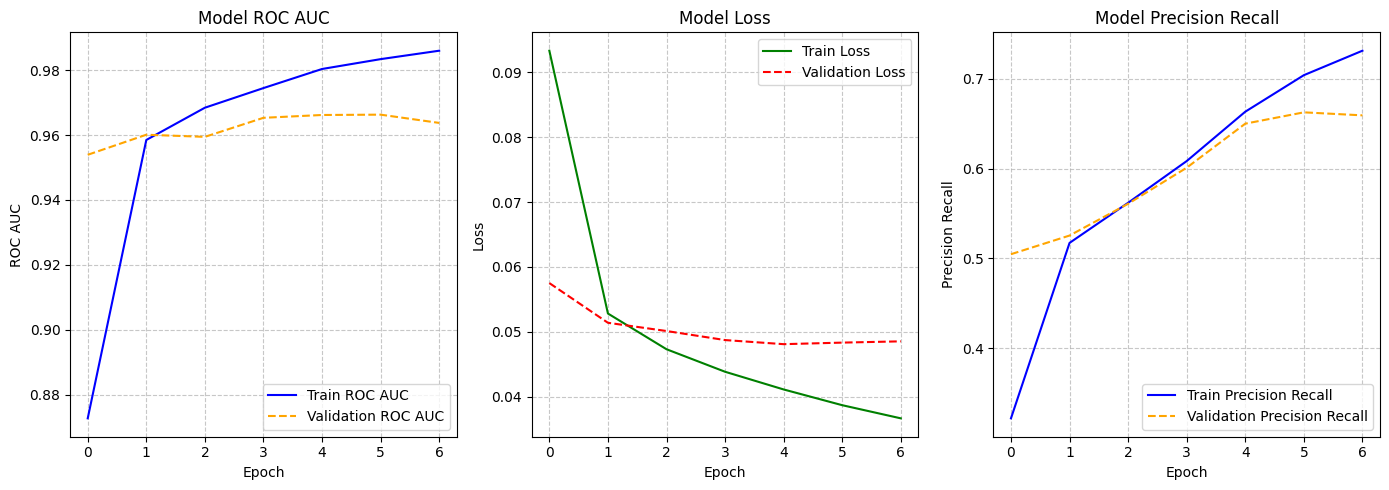

In [108]:
# Plot the curves
plt.figure(figsize=(14, 5))

# Subplot 1: ROC AUC
plt.subplot(1, 3, 1)
plt.plot(history.history['roc_auc'], label='Train ROC AUC', color='blue', linestyle='solid')
plt.plot(history.history['val_roc_auc'], label='Validation ROC AUC', color='orange', linestyle='dashed')
plt.title('Model ROC AUC')
plt.xlabel('Epoch')
plt.ylabel('ROC AUC')
plt.legend(loc='lower right')
plt.grid(True, which='both', alpha=0.7, linestyle='dashed')

# Subplot 2: Loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss', color='green', linestyle='solid')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='dashed')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True, which='both', alpha=0.7, linestyle='dashed')


# Subplot 3: Precision Recall
plt.subplot(1, 3,3 )
plt.plot(history.history['precision_recall'], label='Train Precision Recall', color='blue', linestyle='solid')
plt.plot(history.history['val_precision_recall'], label='Validation Precision Recall', color='orange', linestyle='dashed')
plt.title('Model Precision Recall')
plt.xlabel('Epoch')
plt.ylabel('Precision Recall')
plt.legend(loc='lower right')
plt.grid(True, which='both', alpha=0.7, linestyle='dashed')

plt.tight_layout()
plt.show()


In [143]:
Net.evaluate(testing_dataset)

499/499 [==============================] - 1s 2ms/step - loss: 0.0526 - roc_auc: 0.9582 - precision_recall: 0.5495


[0.052645549178123474, 0.9582116603851318, 0.5495303273200989]

In [110]:
def prediction(text):
    pred = np.where(Net.predict(text) > 0.5, 1, 0)

    predicted_indices = [i for i, value in enumerate(pred[0]) if value == 1]
    predicted_labels = [label_names[index] for index in predicted_indices]

    print(f"Original text: {text}")
    print(f" Predictions: {pred}")
    print(f"Predicted labels: {predicted_labels}")

In [111]:
label_names = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [140]:
dirty_text =["roses are red, violets are blue, I'll smash your fucking head with a sledgehammer"]
clean_text = ['The best way to predict the future is to invent it.']
clean_text2 = ['Today we just want have some fun building AI.']
dirty_text2 = ["you're an idiot gay"]

In [141]:
prediction(dirty_text), prediction(dirty_text2)

1/1 [==============================] - 0s 26ms/step
Original text: ["roses are red, violets are blue, I'll smash your fucking head with a sledgehammer"]
 Predictions: [[1 0 1 0 1 0]]
Predicted labels: ['toxic', 'obscene', 'insult']
1/1 [==============================] - 0s 26ms/step
Original text: ["you're an idiot gay"]
 Predictions: [[1 0 1 0 1 1]]
Predicted labels: ['toxic', 'obscene', 'insult', 'identity_hate']


(None, None)

In [142]:
prediction(clean_text), prediction(clean_text2)

1/1 [==============================] - 0s 28ms/step
Original text: ['The best way to predict the future is to invent it.']
 Predictions: [[0 0 0 0 0 0]]
Predicted labels: []
1/1 [==============================] - 0s 25ms/step
Original text: ['Today we just want have some fun building AI.']
 Predictions: [[0 0 0 0 0 0]]
Predicted labels: []


(None, None)

In [ ]:
pre = Precision()
re = Recall()
for batch in testing_dataset.as_numpy_iterator():
    # unpack the batch
    X_test, y_test = batch
    # make a prediction
    y_pred = Net.predict(X_test)

    y_test = y_test.flatten()
    y_pred = y_pred.flatten()

    pre.update_state(y_test, y_pred)
    re.update_state(y_test, y_pred)

In [116]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}')

Precision: 0.7862201929092407, Recall:0.6825041770935059
